In [20]:
from urllib import request
unempUrl = 'http://api.worldbank.org/countries/fin/indicators/SL.UEM.TOTL.ZS'
gdpUrl = 'http://api.worldbank.org/countries/fin/indicators/NY.GDP.MKTP.CN'

unempData = []
unempData.append( request.urlopen(unempUrl+'?page=1').read() )
unempData.append( request.urlopen(unempUrl+'?page=2').read() )

gdpData = []
gdpData.append( request.urlopen(gdpUrl+'?page=1').read() )
gdpData.append( request.urlopen(gdpUrl+'?page=2').read() )


In [21]:
import xml.etree.ElementTree as ET
from io import BytesIO

unempRates = []
unempDates = []
for data in unempData:
    root = ET.parse(BytesIO(data)).getroot()
    for child in root:
        uer = child.find("{http://www.worldbank.org}value")
        date = child.find("{http://www.worldbank.org}date")
        
        uer2 = float(uer.text) if type(uer.text) is not type(None) else None 
        
        unempRates.append(uer2)
        unempDates.append(int(date.text))
        
gdps = []
gdpsDates = []
for data in gdpData:
    root = ET.parse(BytesIO(data)).getroot()
    for child in root:
        gdp = child.find("{http://www.worldbank.org}value")
        date = child.find("{http://www.worldbank.org}date")
        
        gdp2 = int(gdp.text) if type(gdp.text) is not type(None) else None
        
        gdps.append(gdp2)
        gdpsDates.append(int(date.text))
        

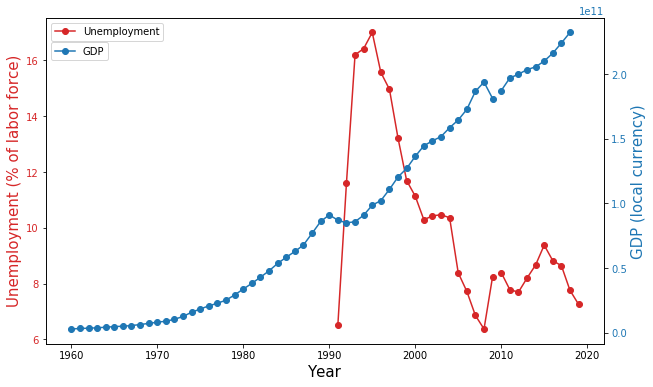

In [24]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [10, 6]
fig, ax1 = plt.subplots()

ax1.set_xlabel('Year', fontsize=15)
ax1.set_ylabel('Unemployment (% of labor force)', color='tab:red', fontsize=15)
ax1.plot(unempDates, unempRates, color='tab:red', linestyle='-', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.legend(["Unemployment"], loc='upper left')
            
ax2 = ax1.twinx()
ax2.set_ylabel('GDP (local currency)', color='tab:blue', fontsize=15)
ax2.plot(unempDates, gdps, color='tab:blue', linestyle='-', marker='o')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.legend(["GDP"], loc='upper left', bbox_to_anchor=(0.0, 0.94))

# Note: missing values are not plotted
fig.savefig('unemployment_vs_gdp.pdf')